# DataCamp - Introduction to Statistics in Python

In [1]:
# load data folder
data_folder = "/Users/miguelbaptista/Library/CloudStorage/OneDrive-Personal/Data_Science/Python/MOOC/DataCamp/ficheiros_2/"

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# 0) Load files

In [3]:
# load course files
amir_deals = pd.read_csv(data_folder + "amir_deals.csv", index_col=0)
food_consumption = pd.read_csv(data_folder + "food_consumption.csv", index_col=0)
world_happiness = pd.read_csv(data_folder + "world_happiness.csv", index_col=0)


# 1) Summary Statistics

In [4]:
# vídeo - What is statistics

## Measures of center

In [5]:
# Import numpy with alias np
import numpy as np

# Subset country for USA: usa_consumption
usa_consumption = food_consumption[food_consumption["country"] == 'USA']
display(usa_consumption.head(2))

# Calculate mean consumption in USA
print(np.mean(usa_consumption["consumption"]))

# Calculate median consumption in USA
print(np.median(usa_consumption["consumption"]))


,country,food_category,consumption,co2_emission
56,USA,pork,27.64,97.83
57,USA,poultry,50.01,53.72


44.650000000000006
14.58


(130, 4)


,country,food_category,consumption,co2_emission
9,Argentina,rice,8.77,11.22
20,Australia,rice,11.03,14.12
31,Albania,rice,7.78,9.96
42,Iceland,rice,3.89,4.98
53,New Zealand,rice,9.16,11.72


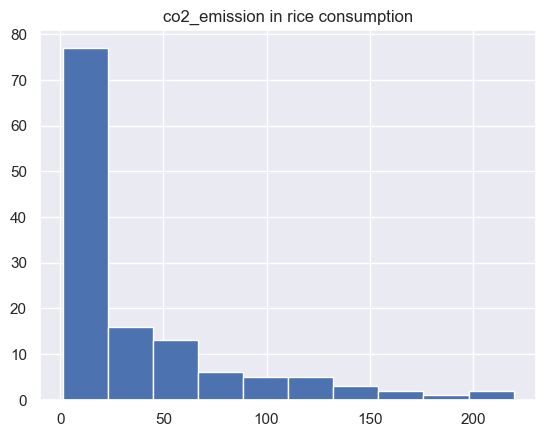

In [6]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption["food_category"] == 'rice']
print(rice_consumption.shape)
display(rice_consumption.head())

# Histogram of co2_emission for rice and show plot
plt.hist(rice_consumption["co2_emission"])
plt.title("co2_emission in rice consumption")
plt.show()

In [7]:
# Subset for food_category equals rice
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']

# Calculate mean and median of co2_emission with .agg()
print(rice_consumption["co2_emission"].agg(["mean", "median"]))

mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64


- Question:
Given the skew of this data, what measure of central tendency best summarizes the kilograms of CO2 emissions per person per year for rice?

- Answer: Median

## Measures of spread

In [8]:
# ddof --> “Delta Degrees of Freedom”: the divisor used in the calculation is N - ddof, where N represents 
#                                      the number of elements. By default ddof is zero

# np.var(, ddof=0)---> default ---> for SAMPLE variance   /(N - 1)
# np.var(, ddof=1) ---> for POPULATION variance           / N

In [9]:
# np.mean(np.ab(distances)) ---> Mean absolute deviation

In [10]:
# quantiles (percentiles)

#np.quantile(, 0.5)  ----> 50% (this is the same as the median)


# quartiles --> 
# np.linspace(start, stop, number_of_quantiles)

# IQR (Interquartile range)
# we can use quantiles (difference) or iqr from scipy

# outliers --> 
#  data < Q1 - 1.5*IQR   
# or
#  data > Q3 +1.5*IQR

## Variance and standard deviation

In [11]:
display(food_consumption.head())

,country,food_category,consumption,co2_emission
1,Argentina,pork,10.51,37.20
2,Argentina,poultry,38.66,41.53
3,Argentina,beef,55.48,1712.00
4,Argentina,lamb_goat,1.56,54.63
5,Argentina,fish,4.36,6.96


In [12]:
# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby('food_category')['co2_emission'].agg(['var', 'std']))

                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


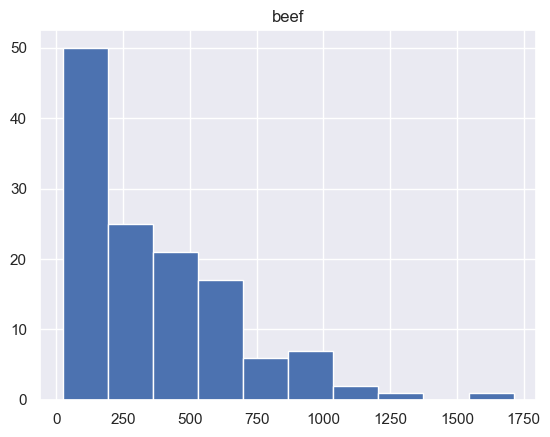

In [13]:
# Create histogram of co2_emission for food_category 'beef'
food_consumption[food_consumption["food_category"] == 'beef']['co2_emission'].hist()
plt.title('beef')
plt.show()

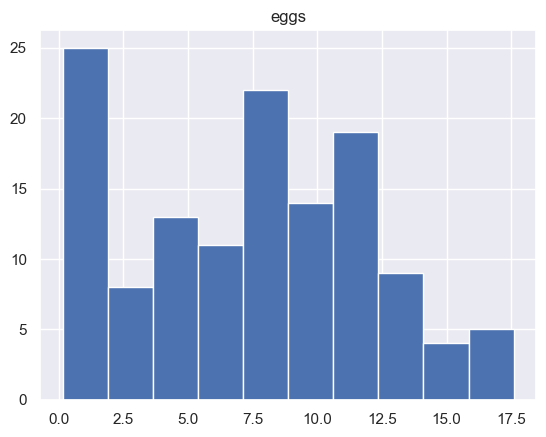

In [14]:
# Create histogram of co2_emission for food_category 'eggs'
food_consumption[food_consumption["food_category"] == 'eggs']['co2_emission'].hist()
plt.title('eggs')
plt.show()

## Quartiles, quantiles, and quintiles

In [15]:
# Calculate the quartiles of the co2_emission column of food_consumption.
print(np.quantile(food_consumption["co2_emission"], [0, 0.25, 0.50, 0.75, 1]))

[   0.        5.21     16.53     62.5975 1712.    ]


In [16]:
# Calculate the six quantiles that split up the data into 5 pieces (quintiles) of the co2_emission column of food_consumption.
print(np.quantile(food_consumption["co2_emission"], np.linspace(0, 1, 6)))

[   0.       3.54    11.026   25.59    99.978 1712.   ]


In [17]:
# Calculate the eleven quantiles of co2_emission that split up the data into ten pieces (deciles).
print(np.quantile(food_consumption["co2_emission"], np.linspace(0, 1, 11)))

[0.00000e+00 6.68000e-01 3.54000e+00 7.04000e+00 1.10260e+01 1.65300e+01
 2.55900e+01 4.42710e+01 9.99780e+01 2.03629e+02 1.71200e+03]


## Finding outliers using IQR

In [18]:
food_consumption.head()

,country,food_category,consumption,co2_emission
1,Argentina,pork,10.51,37.20
2,Argentina,poultry,38.66,41.53
3,Argentina,beef,55.48,1712.00
4,Argentina,lamb_goat,1.56,54.63
5,Argentina,fish,4.36,6.96


In [19]:
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

print(emissions_by_country.sort_values(ascending=False))

country
Argentina      2172.40
Australia      1938.66
Albania        1777.85
New Zealand    1750.95
Iceland        1731.36
                ...   
Malawi          207.94
Liberia         203.38
Togo            188.09
Rwanda          181.63
Mozambique      141.40
Name: co2_emission, Length: 130, dtype: float64


In [20]:
# Compute the first and third quartiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr = q3 - q1

print(q3, q1)
print(iqr)

1111.1525000000001 446.66
664.4925000000001


In [21]:
# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr

print(lower, upper)

-550.0787500000001 2107.89125


In [22]:
# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]
print(outliers)

country
Argentina    2172.4
Name: co2_emission, dtype: float64


# 2) Random Numbers and Probability

## What are the chances?

In [23]:
# df.sample(n) ---> selects n pseudo-randomly

# np.random.seed(10) --> to ensure consistent results (the number inside is arbitrary)

# sampling without replacement

####

# sampling with replacement
# df.sample(2, replace=True)


In [24]:
amir_deals.head()

,product,client,status,amount,num_users
1,Product F,Current,Won,7389.52,19
2,Product C,New,Won,4493.01,43
3,Product B,New,Won,5738.09,87
4,Product I,Current,Won,2591.24,83
5,Product E,Current,Won,6622.97,17


In [25]:
# Count the deals for each product
counts = amir_deals["product"].value_counts()
print(counts)

product
Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
Name: count, dtype: int64


In [26]:
# Calculate probability of picking a deal with each product
probs = counts / counts.sum()
print(probs)

product
Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: count, dtype: float64


Question
If you randomly select one of Amir's deals, what's the probability that the deal will involve Product C?

Answer: 8.43%

In [27]:
# Set random seed
np.random.seed(24)

# Sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5)
print(sample_without_replacement)

       product   client status   amount  num_users
128  Product B  Current    Won  2070.25          7
149  Product D  Current    Won  3485.48         52
78   Product B  Current    Won  6252.30         27
105  Product D  Current    Won  4110.98         39
167  Product C      New   Lost  3779.86         11


In [28]:
# Set random seed
np.random.seed(24)

# Sample 5 deals with replacement
sample_with_replacement = amir_deals.sample(5, replace=True)
print(sample_with_replacement)

       product   client status   amount  num_users
163  Product D  Current    Won  6755.66         59
132  Product B  Current    Won  6872.29         25
88   Product C  Current    Won  3579.63          3
146  Product A  Current    Won  4682.94         63
146  Product A  Current    Won  4682.94         63


Question
What type of sampling is better to use for this situation?

Answer: without replacement

## Discrete distributions

In [29]:
# Law of large numbers

In [30]:
# # Create a histogram of restaurant_groups and show plot
# restaurant_groups['group_size'].plot(kind='hist', bins=[2, 3, 4, 5, 6])
# plt.show()

In [31]:
# # Create probability distribution
# size_dist = restaurant_groups['group_size'] / restaurant_groups['group_size'].sum()

# # Reset index and rename columns
# size_dist = size_dist.reset_index()
# size_dist.columns = ['size_dist', 'group_size']

# print(size_dist)

In [32]:
# # Calculate expected value
# expected_value = np.sum(size_dist['group_size']*size_dist['prob'])
# print(expected_value)

In [33]:
# # Subset groups of size 4 or more
# groups_4_or_more = size_dist[size_dist['group_size'] >= 4]

# # Sum the probabilities of groups_4_or_more
# prob_4_or_more = np.sum(groups_4_or_more['prob'])
# print(prob_4_or_more)

## Continuous distributions

In [34]:
# Continuous uniform distribution ---> horizontal line

from scipy.stats import uniform

print("probability of waiting time <= 7: ", uniform.cdf(7, 0, 12) )  
print("probability of waiting time >= 7: ", 1 - uniform.cdf(7, 0, 12) )  
print("probability of waiting time between 4 and 7: ", uniform.cdf(7, 0, 12) - uniform.cdf(4, 0, 12) )   

print("\n")

# Generating random numbers according to uniform distribution

from scipy.stats import uniform

print("Generate 10 random values between 0 and 5: \n", uniform.rvs(0, 5, size=10) )

probability of waiting time <= 7:  0.5833333333333334
probability of waiting time >= 7:  0.41666666666666663
probability of waiting time between 4 and 7:  0.25000000000000006


Generate 10 random values between 0 and 5: 
 [1.1003365  1.80528177 3.69920495 4.98227863 1.58173489 0.6827229
 1.91990005 1.60259642 1.83207377 3.54825781]


In [35]:
####

In [36]:
amir_deals.head()

,product,client,status,amount,num_users
1,Product F,Current,Won,7389.52,19
2,Product C,New,Won,4493.01,43
3,Product B,New,Won,5738.09,87
4,Product I,Current,Won,2591.24,83
5,Product E,Current,Won,6622.97,17


In [37]:
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

In [38]:
# Import uniform from scipy.stats
from scipy.stats import uniform

# Calculate probability of waiting less than 5 mins
prob_less_than_5 = uniform.cdf(5, min_time, max_time)
print("prob_less_than_5: ", prob_less_than_5)

# Calculate probability of waiting more than 5 mins
prob_greater_than_5 = 1 - uniform.cdf(5, min_time, max_time) 
print("prob_greater_than_5: ", prob_greater_than_5)

# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 = uniform.cdf(20, min_time, max_time) - uniform.cdf(10, min_time, max_time)
print("prob_between_10_and_20: ", prob_between_10_and_20)

prob_less_than_5:  0.16666666666666666
prob_greater_than_5:  0.8333333333333334
prob_between_10_and_20:  0.3333333333333333


In [39]:
# Set random seed to 334
np.random.seed(334)

# Import uniform
from scipy.stats import uniform

# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(0, 30, size=1000)

# check just first 5
print(wait_times[:5])

[7.144097   0.97455866 3.72802787 5.11644319 8.70602482]


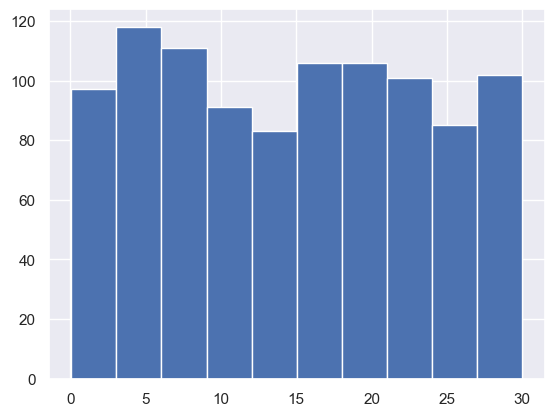

In [40]:
# Create a histogram of simulated times and show plot
plt.hist(wait_times)
plt.show()

## The binomial distribution

In [41]:
# vídeo

from scipy.stats import binom

# binom.rvs(# of coins, probability of heads/success, size= # of trials)

# rvs --> Random variates

print(binom.rvs(1, 0.5, size=1))
print(binom.rvs(1, 0.5, size=8))
print(binom.rvs(8, 0.5, size=1)) # flipping 8 coins 1 time --> number of heads/successes/1's

print("\n")
# Other probabilities

# Heads with 25% chance and Tails with 75% chance
print(binom.rvs(3, 0.25, size=10))

# Binomial distribution --> Probability distribution of the number of successes in a sequence of independent trials-
# binom.rvs(3, 0.5 (probability of success), size= 10 (n, number of trials))

# What is the probability of 7 heads?
# print(binom.pmf(number of heads, number of trials, probability of heads))
print("What is the probability of 7 heads? (pmf - Probability mass function): ", binom.pmf(7, 10, 0.5))


# What is the probability of getting 7 or fewer heads?
print("What is the probability of getting 7 or fewer heads? (cdf - Cumulative distribution function): ",binom.cdf(7, 10, 0.5))


[1]
[1 0 0 1 0 0 1 0]
[3]


[1 1 1 0 0 0 1 1 1 0]
What is the probability of 7 heads? (pmf - Probability mass function):  0.11718750000000004
What is the probability of getting 7 or fewer heads? (cdf - Cumulative distribution function):  0.9453125


In [42]:
###

In [43]:
amir_deals.head(3)

,product,client,status,amount,num_users
1,Product F,Current,Won,7389.52,19
2,Product C,New,Won,4493.01,43
3,Product B,New,Won,5738.09,87


In [44]:
# Import binom from scipy.stats
from scipy.stats import binom

# Set random seed to 10
np.random.seed(10)

# Simulate a single deal
print(binom.rvs(1, 0.30, size=1))

# Simulate 1 week of 3 deals
print(print(binom.rvs(3, 0.30, size=1)))

# Simulate 52 weeks of 3 deals
deals = binom.rvs(3, 0.30, size=52)
print(deals)

# Print mean deals won per week
print(np.mean(deals))

[1]
[0]
None
[1 1 1 0 0 1 0 0 1 2 0 1 2 1 1 0 2 1 1 0 1 1 1 1 1 1 1 1 2 1 2 0 0 0 0 2 0
 1 1 2 0 2 1 1 0 2 0 0 1 0 2 0]
0.8461538461538461


In [45]:
# Probability of closing 3 out of 3 deals
prob_3 = binom.pmf(3, 3, 0.30)
print(prob_3)

0.026999999999999996


In [46]:
# Probability of closing <= 1 deal out of 3 deals
prob_less_than_or_equal_1 = binom.cdf(1, 3, 0.30)
print(prob_less_than_or_equal_1)

0.784


In [47]:
# Probability of closing > 1 deal out of 3 deals
prob_greater_than_1 = 1 - binom.cdf(1, 3, 0.30)

print(prob_greater_than_1)

0.21599999999999997


In [48]:
# Expected number won with 30% win rate
won_30pct = 3 * 0.30
print(won_30pct)

# Expected number won with 25% win rate
won_25pct = 3 * 0.25
print(won_25pct)

# Expected number won with 35% win rate
won_35pct = 3 * 0.35
print(won_35pct) # If Amir's win rate goes up by 5%, he can expect to close more than 1 deal on average each week.

0.8999999999999999
0.75
1.0499999999999998


# 3) More Distributions and the Central Limit Theorem

## The normal distribution

In [49]:
# vídeo

from scipy.stats import norm

# cdf --> Cumulative distribution function
print(norm.cdf(154, 161, 7))

# ppf -> Percent point function (inverse of cdf —> percentiles).
print(norm.ppf(0.9, 161, 7)) # what height are 90% of women shorter than? 

# What height are 90% of women taller than?
print(norm.ppf(0.10, 161, 7))

###
print("\n")

# Generating 10 random heights
print(norm.rvs(161, 7, size=10))


0.15865525393145707
169.9708609588122
152.0291390411878


[164.95606869 159.9680582  160.81866264 163.02365943 157.2208465
 165.95712014 166.89557317 162.42506558 177.76292565 167.42221256]


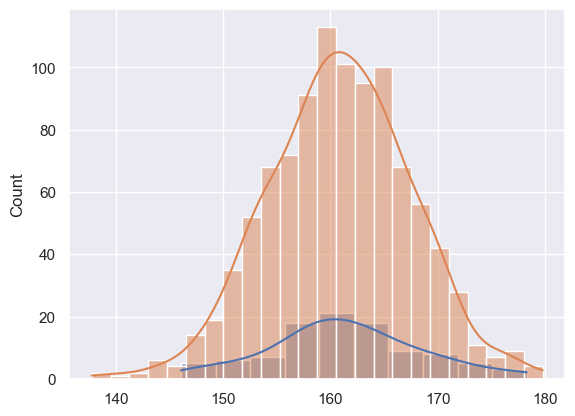

In [50]:
# visually (meu)
import seaborn as sns
sns.histplot(norm.rvs(161, 7, size=100), kde=True) # kernel density estimate line
sns.histplot(norm.rvs(161, 7, size=1000), kde=True) # kernel density estimate line
plt.show()

In [51]:
##

In [52]:
amir_deals.head(2)

,product,client,status,amount,num_users
1,Product F,Current,Won,7389.52,19
2,Product C,New,Won,4493.01,43


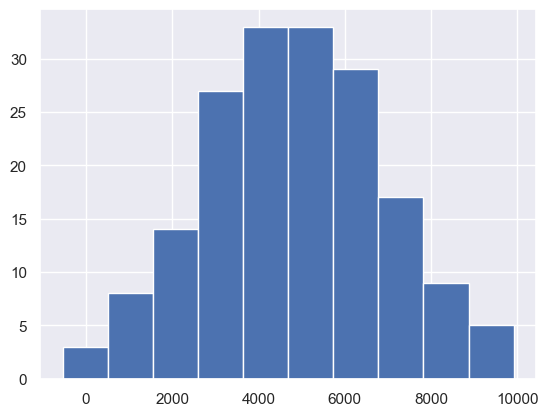

In [53]:
# Histogram of amount with 10 bins and show plot
amir_deals["amount"].hist(bins=10)
plt.show()

In [54]:
# Probability of deal < 7500
prob_less_7500 = norm.cdf(7500, 5000, 2000)
print(prob_less_7500)

0.8943502263331446


In [55]:
# Probability of deal > 1000
prob_over_1000 = 1 - norm.cdf(1000, 5000, 2000)
print(prob_over_1000)

0.9772498680518208


In [56]:
# Probability of deal between 3000 and 7000
prob_3000_to_7000 = norm.cdf(7000, 5000, 2000) - norm.cdf(3000, 5000, 2000)
print(prob_3000_to_7000)

0.6826894921370859


In [57]:
# Calculate amount that 25% of deals will be less than
pct_25 = norm.ppf(0.25, 5000, 2000)
print(pct_25)

3651.0204996078364


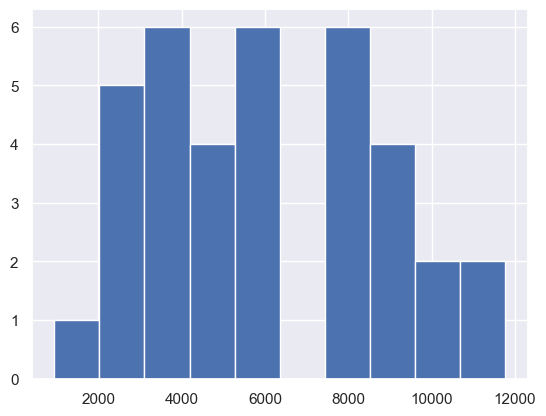

In [58]:
# Calculate new average amount
new_mean = 5000*1.20

# Calculate new standard deviation
new_sd = 2000*1.30

# Simulate 36 new sales
new_sales = norm.rvs(new_mean, new_sd, size=36)

# Create histogram and show
plt.hist(new_sales)
plt.show()

## The central limit theorem

In [59]:
# vídeo


In [60]:
amir_deals.head(2)

,product,client,status,amount,num_users
1,Product F,Current,Won,7389.52,19
2,Product C,New,Won,4493.01,43


(178,)


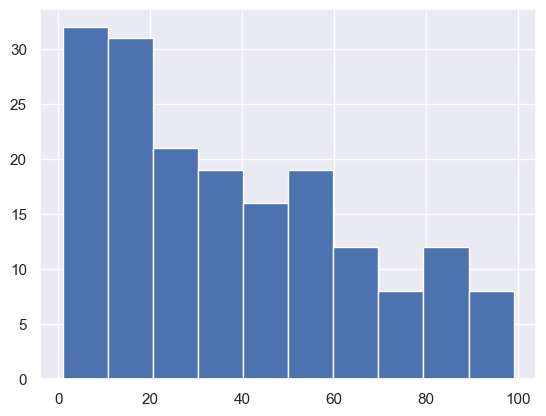

In [61]:
# Create a histogram of num_users and show
print(amir_deals["num_users"].shape)

amir_deals["num_users"].hist()
plt.show()

In [62]:
# Set seed to 104
np.random.seed(104)

# Sample 20 num_users with replacement from amir_deals
samp_20 = amir_deals["num_users"].sample(20, replace=True)

# Take mean of samp_20
print(np.mean(samp_20))

32.0


In [63]:
sample_means = []
# Loop 100 times
for i in range(100):
  # Take sample of 20 num_users
  samp_20 = amir_deals['num_users'].sample(20, replace=True)
  # Calculate mean of samp_20
  samp_20_mean = np.mean(samp_20)
  # Append samp_20_mean to sample_means
  sample_means.append(samp_20_mean)
  
print(sample_means)

[31.35, 45.05, 33.55, 38.15, 50.85, 31.85, 34.65, 36.25, 38.9, 44.05, 35.45, 37.6, 37.95, 28.85, 33.3, 31.65, 45.5, 43.2, 24.4, 41.05, 37.2, 39.3, 29.45, 33.55, 45.3, 45.1, 30.95, 36.25, 37.65, 42.55, 34.55, 41.1, 36.9, 42.45, 38.45, 45.9, 42.7, 38.4, 32.55, 30.25, 38.0, 38.75, 49.3, 39.55, 49.05, 42.05, 41.0, 40.6, 58.25, 34.55, 51.2, 34.15, 36.95, 42.45, 41.85, 33.2, 36.15, 37.55, 34.2, 29.75, 42.35, 43.75, 29.0, 32.05, 31.65, 44.6, 30.85, 29.6, 37.7, 33.1, 36.35, 40.65, 45.7, 33.8, 40.1, 39.9, 33.5, 32.65, 32.85, 42.85, 35.4, 31.7, 32.0, 33.85, 36.6, 44.35, 39.9, 37.0, 37.3, 42.5, 38.35, 42.8, 44.55, 30.3, 50.45, 42.35, 40.65, 29.85, 39.3, 33.1]


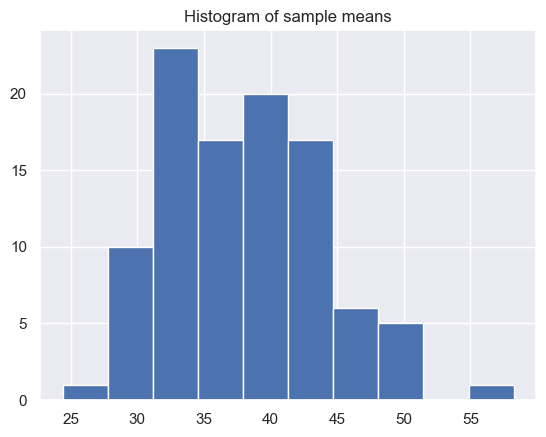

In [64]:
# Convert to Series and plot histogram
sample_means_series = pd.Series(sample_means)
sample_means_series.hist()
plt.title("Histogram of sample means")
# Show plot
plt.show()

In [65]:
%%script false --no-raise-error

# Set seed to 321
np.random.seed(321)

all_deals = ???

sample_means = []
# Loop 30 times to take 30 means
for i in range(30):
  # Take sample of size 20 from num_users col of all_deals with replacement
  cur_sample = all_deals['num_users'].sample(20, replace=True)
  # Take mean of cur_sample
  cur_mean = np.mean(cur_sample)
  # Append cur_mean to sample_means
  sample_means.append(cur_mean)

# Print mean of sample_means
print(np.mean(sample_means))

# Print mean of num_users in amir_deals
print(np.mean(amir_deals["num_users"]))


## The Poisson distribution

In [66]:
# vídeo

# Poisson distribution --> Probability of some number of events occuring over a fixed period of time

# Lambda = average number of events per time interval
# it is also the expected value (peek of the distribution)

# it's a discrete distribution

from scipy.stats import poisson

# if Lambda = 8, average number of adoptions per week, 8, what is the probability of getting 5 adoptions in a week?
print("Probability of getting 5 adoptions in a week?: ", poisson.pmf(5, 8)) # probability mass function

# Probability of number of adoptions per week is <= 5?
print("Probability of number of adoptions per week is <= 5?: ", poisson.cdf(5, 8)) # cumulative distribution function

# Probability of number of adoptions per week is > 5?
print("Probability of number of adoptions per week is > 5?: ", 1 - poisson.cdf(5, 8)) # cumulative distribution function


Probability of getting 5 adoptions in a week?:  0.09160366159257921
Probability of number of adoptions per week is <= 5?:  0.1912360620796254
Probability of number of adoptions per week is > 5?:  0.8087639379203746


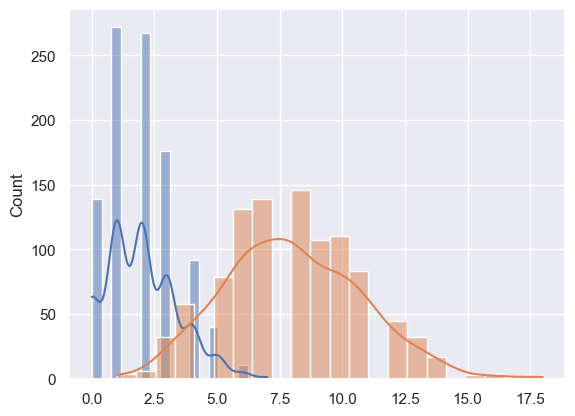

In [67]:
# visually (meu)
import seaborn as sns
sns.histplot(poisson.rvs(2, size=1000), kde=True) # kernel density estimate line
sns.histplot(poisson.rvs(8, size=1000), kde=True) # kernel density estimate line
plt.show()

In [68]:
###

In [69]:
# Import poisson from scipy.stats
from scipy.stats import poisson

# Probability of 5 responses (probability that Amir responds to 5 leads in a day, given that he responds to an average of 4)
prob_5 = poisson.pmf(5, 4)
print(prob_5)

0.1562934518505317


In [70]:
# Probability of 5 responses
prob_coworker = poisson.pmf(5, 5.5)
print(prob_coworker)

0.17140068409793663


In [71]:
# Probability of 2 or fewer responses (Amir)
prob_2_or_less = poisson.cdf(2, 4)
print(prob_2_or_less)

0.2381033055535443


In [72]:
# Probability of > 10 responses (Amir)
prob_over_10 = 1 - poisson.cdf(10, 4)
print(prob_over_10)

0.0028397661205137315


## More probability distributions

In [73]:
# vídeo

# Exponential distribution

# example: Probability of time between Poisson events
# example: customer service requests. On avergae, 1 customer service ticket is created every 2 minutes

from scipy.stats import expon

# Probability of waiting < 1 minute for a request
print("Probability of waiting < 1 minute for a request?: ", expon.cdf(1, scale = 1/0.5))

# Probability of waiting for more than 4 minutes?
print("Probability of waiting for more than 4 minutes?: ", 1 - expon.cdf(4, scale=1/0.5))

# Probability of waiting between 1 and 4 minutes?
print("Probability of waiting between 1 and 4 minutes?: ", expon.cdf(4, scale=2) - expon.cdf(1, scale=2))

#######

# (Student's) t-distribution

# similar shape as the normal distribution, but with larger tails
# it has an important parameter: degrees of freedom. The lower the degrees of freedon, the thicker the tails, higher std
# à medida que graus de liberdade crescem, mais se aproxima da distribuição normal.

# A distribuição t de Student é uma distribuição de probabilidade, publicada por William Sealy Gosset sob o 
# pseudónimo Student que não podia usar seu nome verdadeiro para publicar trabalhos enquanto trabalhasse para a 
# cervejaria Guinness.

#######

# Log-normal distribution

# Variables whose logarithm is normally distributed!

# exemplos:
# - duração de jogos de xadrez
# - pressão arterial em adultos
# - número de hospitalizações num SARS outbreak


Probability of waiting < 1 minute for a request?:  0.3934693402873666
Probability of waiting for more than 4 minutes?:  0.1353352832366127
Probability of waiting between 1 and 4 minutes?:  0.4711953764760207


In [74]:
###

Modeling time between leads
To further evaluate Amir's performance, **you want to know how much time it takes him to respond to a lead after he opens it**. 

***On average, he responds to 1 request every 2.5 hours***. In this exercise, you'll calculate probabilities of different amounts of time passing between Amir receiving a lead and sending a response.

In [75]:
amir_deals.head(2)

,product,client,status,amount,num_users
1,Product F,Current,Won,7389.52,19
2,Product C,New,Won,4493.01,43


In [76]:
# Import expon from scipy.stats
from scipy.stats import expon

# Print probability response takes < 1 hour
print(expon.cdf(1, scale=2.5))

0.3296799539643607


In [77]:
# Print probability response takes > 4 hours
print(1 - expon.cdf(4, scale=2.5))

0.20189651799465536


In [78]:
# Print probability response takes 3-4 hours
print(expon.cdf(4, scale=2.5) - expon.cdf(3, scale=2.5))

0.09929769391754684


The t-distribution
Which statement is **not** true regarding the t-distribution?

Answer: The t-distribution is skewed.

# 4) Correlation and Experimental Design

## Correlation

In [79]:
# vídeo

# Correlation

# Visualizing relationships
import seaborn as sns

# Pearson correlation, but there are others (not going to see here):
# - Kendell's tau
# Spearman's rho


In [80]:
world_happiness.head()

,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
1,Finland,2.0,5.0,4.0,47.0,42400,81.8,155
2,Denmark,4.0,6.0,3.0,22.0,48300,81.0,154
3,Norway,3.0,3.0,8.0,11.0,66300,82.6,153
4,Iceland,1.0,7.0,45.0,3.0,47900,83.0,152
5,Netherlands,15.0,19.0,12.0,7.0,50500,81.8,151


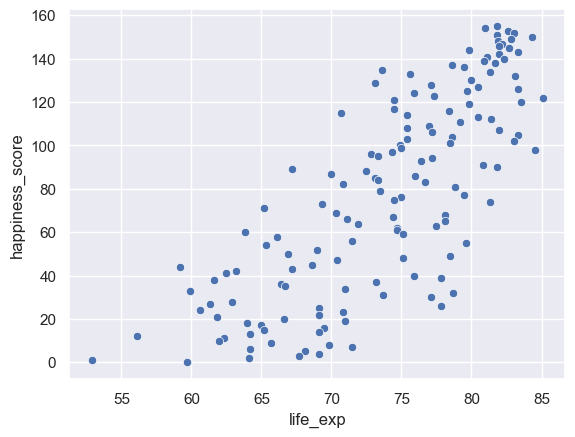

In [81]:
# Create a scatterplot of happiness_score vs. life_exp and show
sns.scatterplot(data=world_happiness, x='life_exp', y='happiness_score')
plt.show()

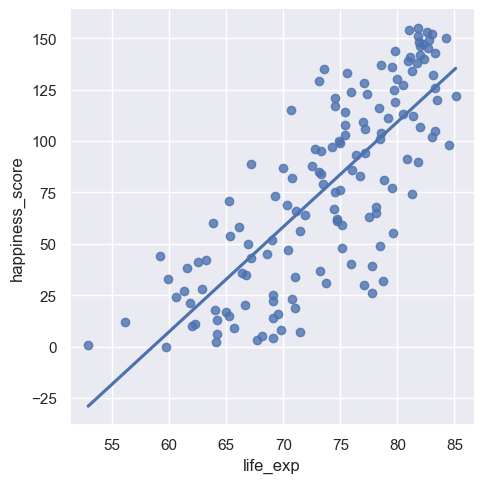

In [82]:
# Create scatterplot of happiness_score vs life_exp with trendline
sns.lmplot(data=world_happiness, x='life_exp', y='happiness_score', ci=None)
plt.show()

In [83]:
# Correlation between life_exp and happiness_score
cor = world_happiness["life_exp"].corr(world_happiness["happiness_score"])

print(cor)

0.7802249053272062


## Correlation caveats

In [84]:
# vídeo

# Caveats, example: Non-linear relationships (x^2 por exemplo indica correlação quase 0 quando claramente não é)

# Correlation does not imply causation 
# - example: US Consumption of margarine per capita per year and rate of divorce per year in place X
# - "Spurious correlation"

# Confounding
# Drinking coffee ---> (Hidden variable, highly associated: Smoking) ---> Lung cancer


In [85]:
world_happiness.head()

,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
1,Finland,2.0,5.0,4.0,47.0,42400,81.8,155
2,Denmark,4.0,6.0,3.0,22.0,48300,81.0,154
3,Norway,3.0,3.0,8.0,11.0,66300,82.6,153
4,Iceland,1.0,7.0,45.0,3.0,47900,83.0,152
5,Netherlands,15.0,19.0,12.0,7.0,50500,81.8,151


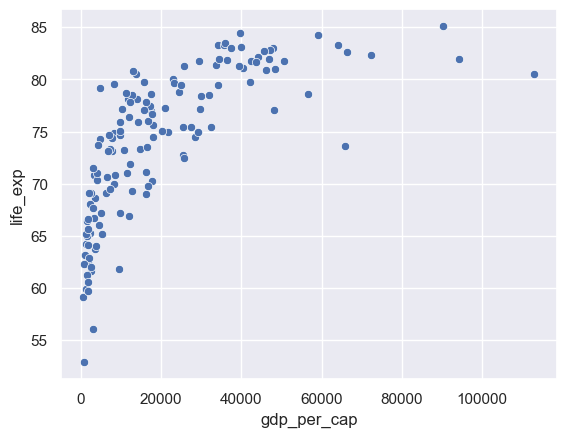

In [86]:
# Scatterplot of gdp_per_cap and life_exp
sns.scatterplot(data=world_happiness, x='gdp_per_cap', y='life_exp')
plt.show()

In [87]:
# Correlation between gdp_per_cap and life_exp
cor = world_happiness["gdp_per_cap"].corr(world_happiness["life_exp"])
print(cor)

0.7019547642148015


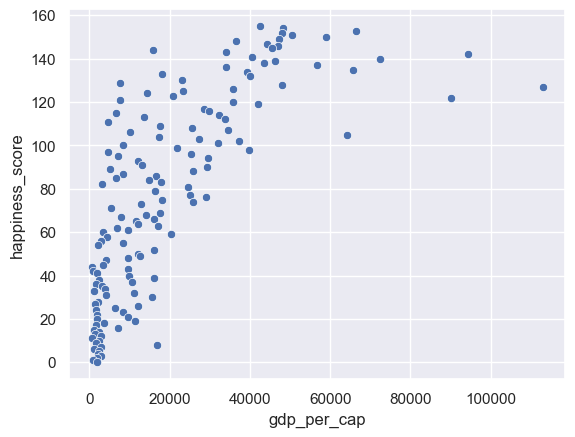

0.7279733012222976


In [88]:
# Scatterplot of happiness_score vs. gdp_per_cap
sns.scatterplot(data=world_happiness, x='gdp_per_cap', y='happiness_score')
plt.show()

# Calculate correlation
cor = world_happiness["happiness_score"].corr(world_happiness["gdp_per_cap"])
print(cor)

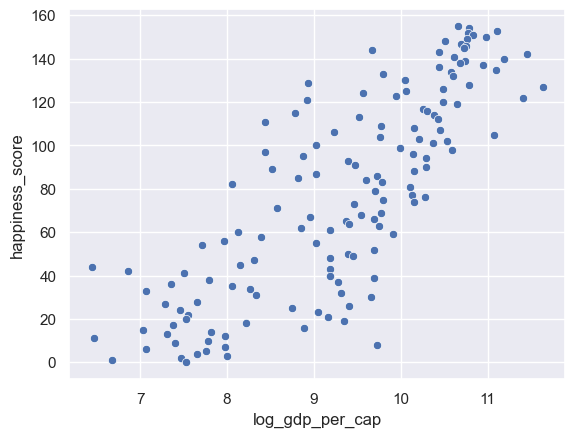

0.8043146004918289


In [89]:
# Create log_gdp_per_cap column
world_happiness['log_gdp_per_cap'] = np.log(world_happiness['gdp_per_cap'])

# Scatterplot of happiness_score vs. log_gdp_per_cap
sns.scatterplot(data=world_happiness, x='log_gdp_per_cap', y='happiness_score')
plt.show()

# Calculate correlation
cor = world_happiness["happiness_score"].corr(world_happiness["log_gdp_per_cap"])
print(cor)

In [90]:
%%script false --no-raise-error

# Does sugar improve happiness?
 # (no data on this available)

# Scatterplot of grams_sugar_per_day and happiness_score
sns.scatterplot(data=world_happiness, x='grams_sugar_per_day', y='happiness_score')
plt.show()

# Correlation between grams_sugar_per_day and happiness_score
cor = world_happiness["happiness_score"].corr(world_happiness["grams_sugar_per_day"])
print(cor) # 0.6939100021829633

#########

## Design of experiments

In [91]:
# vídeo

# Controlled experiments

# treatment group vs control group
# confounding or bias (eliminate as possible)
# blind vs double blind


# Observational studies


# Longitudinal vs Cross-sectional studies


